In [49]:
import pickle
import pandas as pd


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [16,8]

# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

In [36]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))


In [3]:
df_time_features_pre_COVID.head()

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_4,month_5,month_6,month_7,month_8,month_9,season_Fall,season_Spring,season_Summer,season_Winter
0,9.0,18.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
1,18.0,15.0,29.0,59.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
2,15.0,29.0,59.0,50.0,18.0,9.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
3,29.0,59.0,50.0,37.0,15.0,18.0,9.0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
4,59.0,50.0,37.0,26.0,29.0,15.0,18.0,9.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [5]:
df_time_features_pre_COVID.dropna(inplace=True)
df_time_features_pre_COVID = df_time_features_pre_COVID.reset_index(drop=True)
df_time_features_pre_COVID = df_time_features_pre_COVID.drop(columns=['year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9','year_2015', 'month_1',])

In [6]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [7]:
train_size = int(len(df_time_features_pre_COVID) *.7)
test_size = len(df_time_features_pre_COVID) - train_size
train, test = df_time_features_pre_COVID[0:train_size], df_time_features_pre_COVID[train_size:len(df_time_features_pre_COVID)]

In [8]:
train_y = train[['y1','y2','y3','y4']]
train_X = train.drop(columns=['y1','y2','y3','y4'])
test_y = test[['y1','y2','y3','y4']]
test_X = test.drop(columns=['y1','y2','y3','y4'])

In [9]:
features = train_X.columns

# Pre-COVID

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611


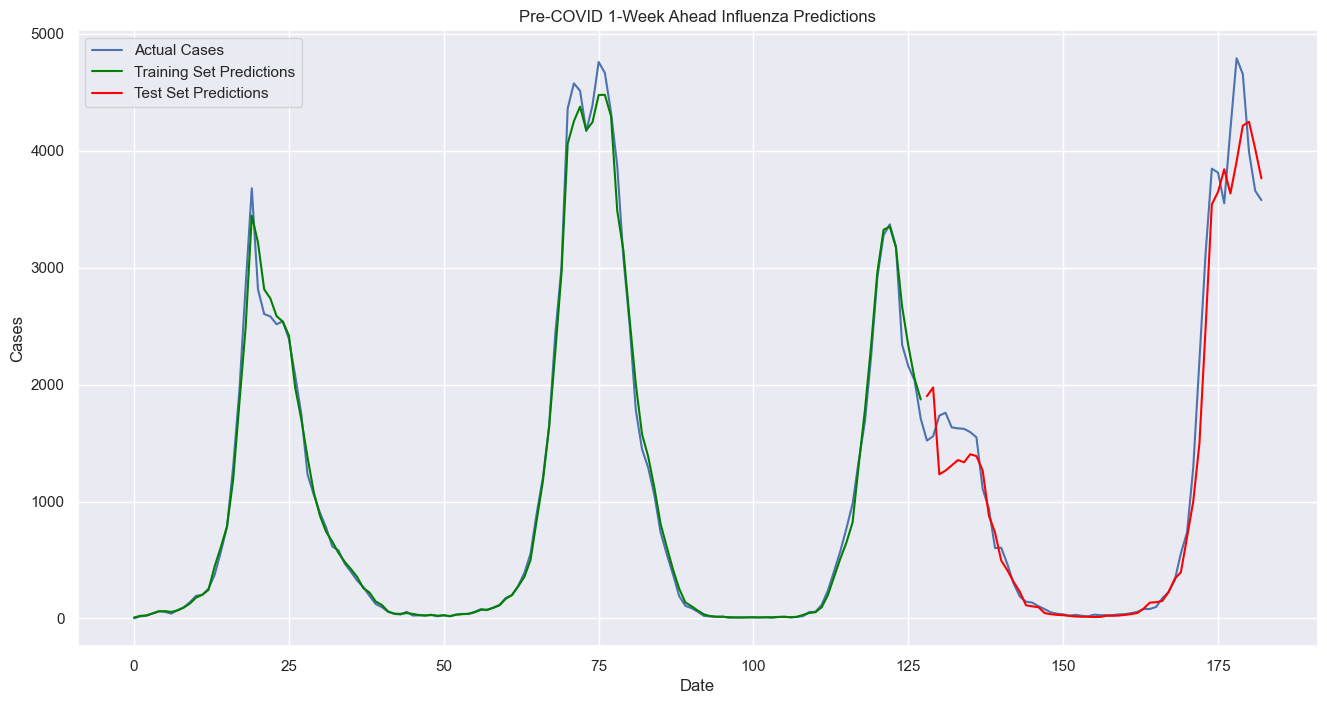

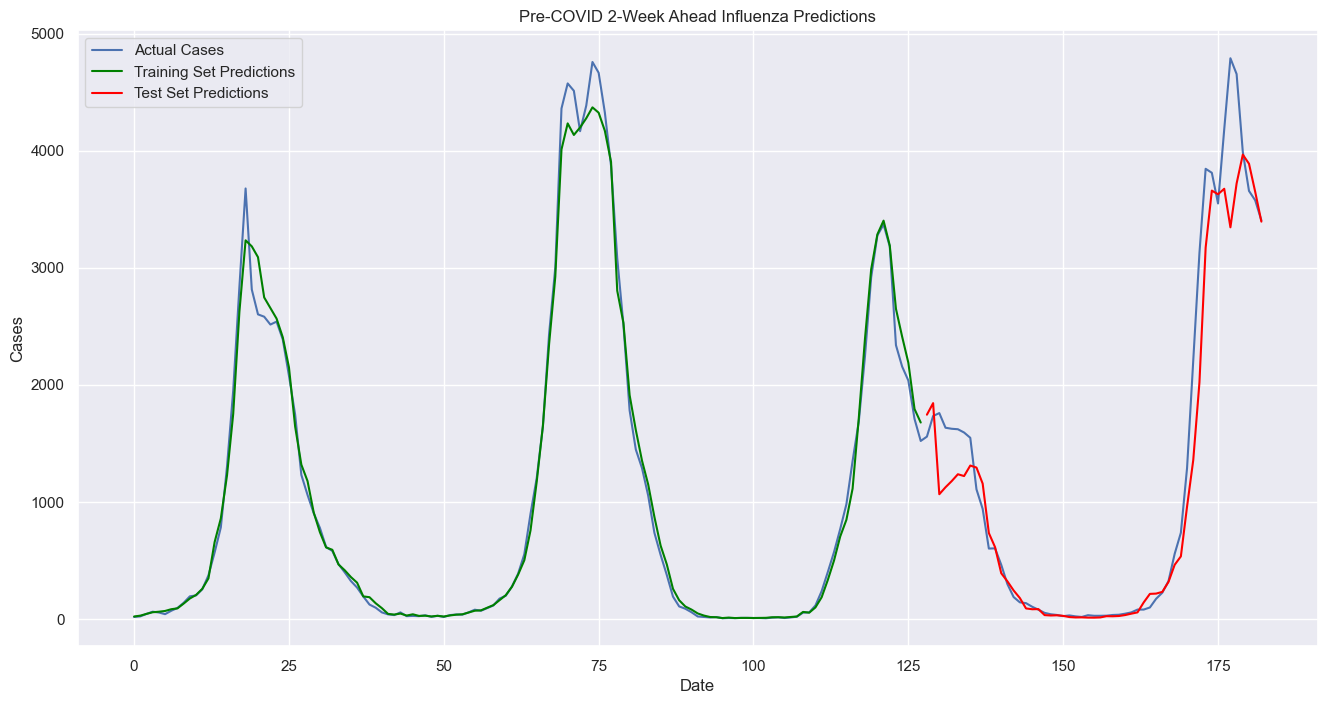

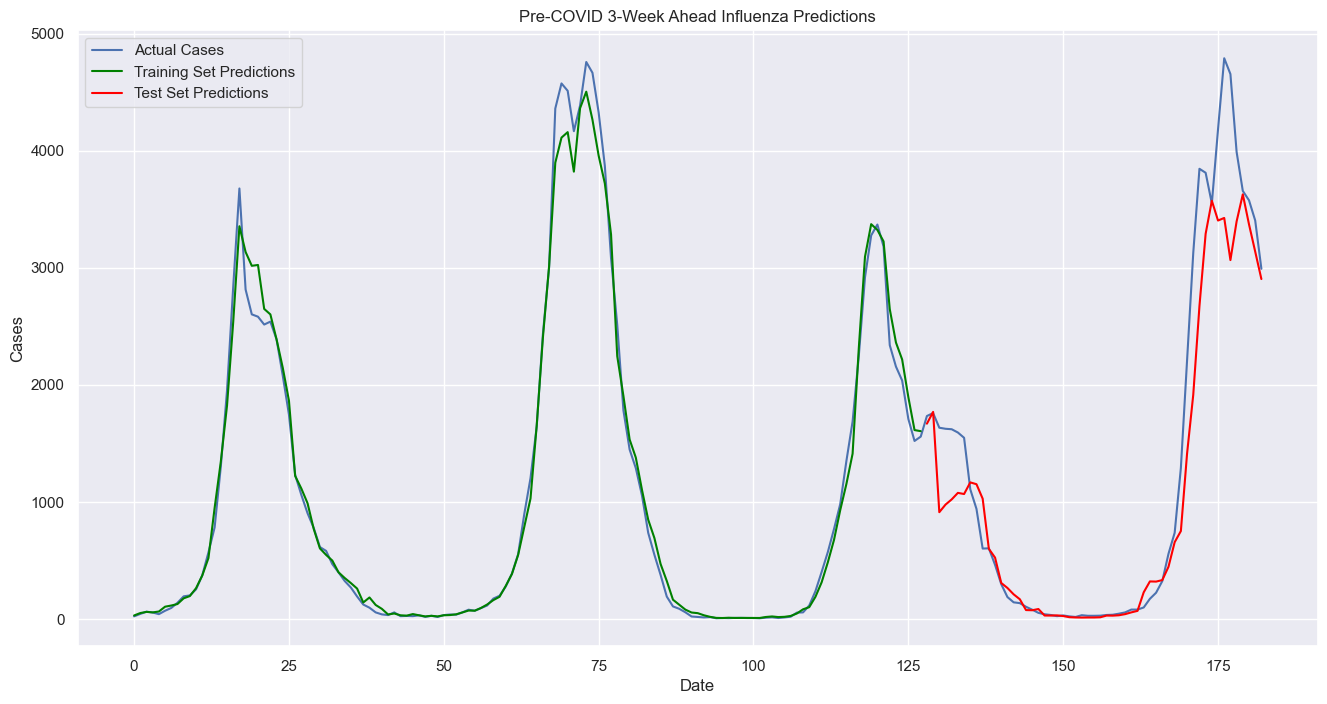

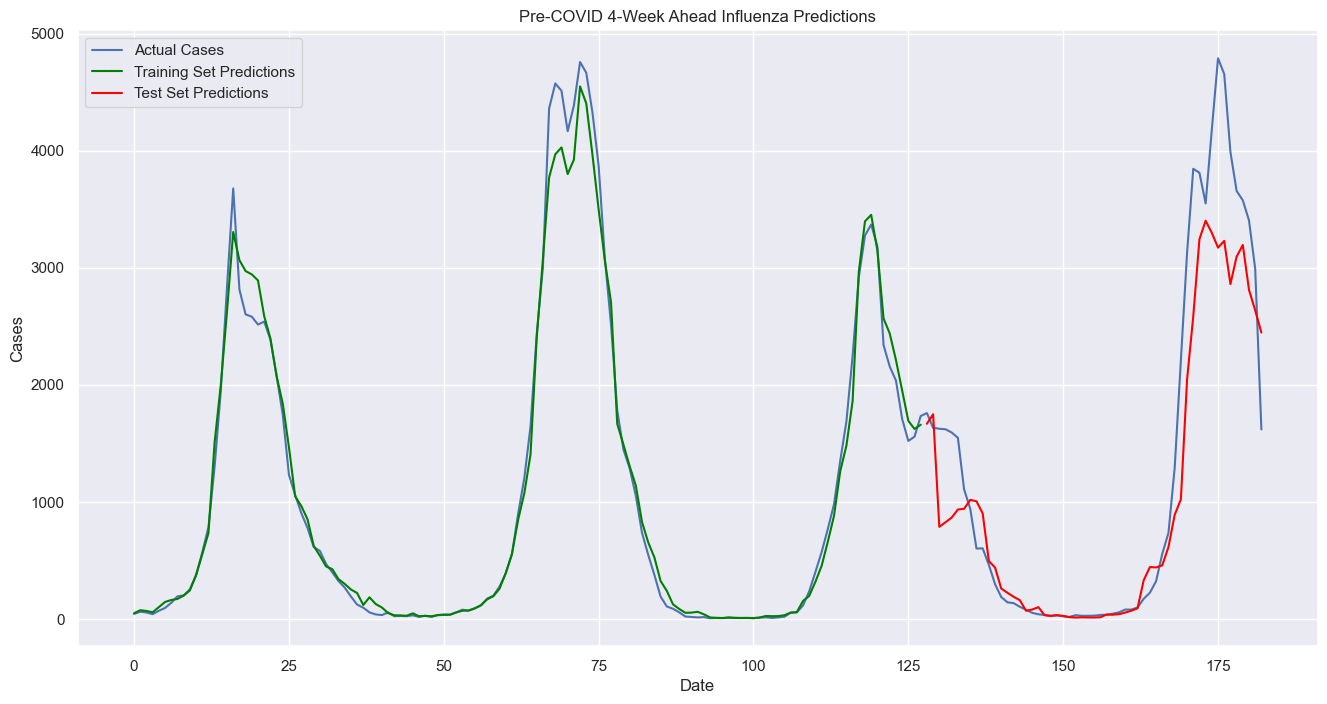

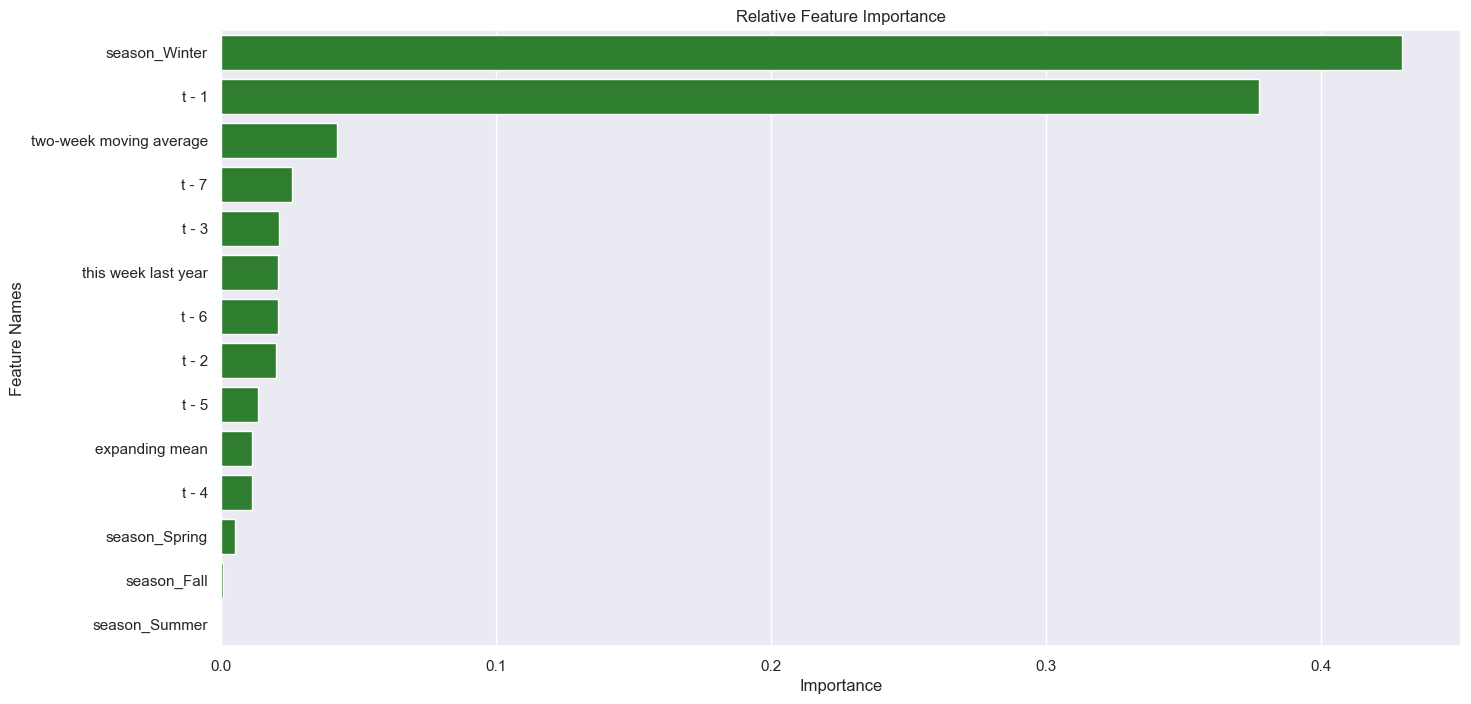

In [ ]:
from sklearn.compose import make_column_transformer

numeric_transform = Pipeline([('scaling', MinMaxScaler())])

ct = make_column_transformer((
    numeric_transform, ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean']),
       remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessing', ct), 
                          ('model', RandomForestRegressor(random_state=2023))])

pipeline.fit(train_X, train_y)

preds_test = pipeline.predict(test_X)
preds_test_df = pd.DataFrame(preds_test,columns=test_y.columns)
preds_train = pipeline.predict(train_X)
preds_train_df = pd.DataFrame(preds_train,columns=train_y.columns)

dataset = 'Pre-COVID'

for i in range(1,5):
    results_matrix = evaluate_model(train=train_y, test=test_y, preds_train=preds_train, preds_test=preds_test, dataset=dataset, forecast_weeks=i, model='RF_test')

# plot
week = 1
for target in preds_train_df.columns:
    plt.figure()
    plt.plot(df_time_features_pre_COVID.index, df_time_features_pre_COVID[target].values, label='Actual Cases')
    plt.plot(df_time_features_pre_COVID.index[:train_size], preds_train_df[target], color='green', label='Training Set Predictions')
    plt.plot(df_time_features_pre_COVID.index[train_size:], preds_test_df[target], color='red', label='Test Set Predictions')
    plt.title(f'{dataset} {week}-Week Ahead Influenza Predictions')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend()
    week += 1

# get feature importances from the model
# referenced https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
importance = pipeline.steps[1][1].feature_importances_
names = pipeline[:-1].get_feature_names_out()

df = pd.DataFrame({'Feature Names':names,'Importance':importance, })
df = df.sort_values(by='Importance', ascending = False)
df[['dtype','Feature Names']] = df['Feature Names'].str.split("__",expand=True)
df = df.drop(columns='dtype')
plt.figure()
sns.barplot(data=df, x='Importance', y='Feature Names', orient='h', color='forestgreen').set(title='Relative Feature Importance')

results_matrix


# Full Dataset

In [64]:
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

In [65]:
df_time_features.head()

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_4,month_5,month_6,month_7,month_8,month_9,season_Fall,season_Spring,season_Summer,season_Winter
0,9.0,18.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
1,18.0,15.0,29.0,59.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
2,15.0,29.0,59.0,50.0,18.0,9.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
3,29.0,59.0,50.0,37.0,15.0,18.0,9.0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
4,59.0,50.0,37.0,26.0,29.0,15.0,18.0,9.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [66]:
df_time_features.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [67]:
df_time_features.dropna(inplace=True)
df_time_features = df_time_features.reset_index(drop=True)
df_time_features = df_time_features.drop(columns=['year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9','year_2015', 'month_1',])

In [68]:
df_time_features.isnull().sum()

y1                         0
y2                         0
y3                         0
y4                         0
t - 1                      0
t - 2                      0
t - 3                      0
t - 4                      0
t - 5                      0
t - 6                      0
t - 7                      0
this week last year        0
two-week moving average    0
expanding mean             0
season_Fall                0
season_Spring              0
season_Summer              0
season_Winter              0
dtype: int64

In [69]:
df_time_features.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [70]:
train_size = int(len(df_time_features) *.7)
test_size = len(df_time_features) - train_size
train, test = df_time_features[0:train_size], df_time_features[train_size:len(df_time_features)]

In [71]:
train_y = train[['y1','y2','y3','y4']]
train_X = train.drop(columns=['y1','y2','y3','y4'])
test_y = test[['y1','y2','y3','y4']]
test_X = test.drop(columns=['y1','y2','y3','y4'])

In [72]:
train_y

,y1,y2,y3,y4
0,2.0,18.0,23.0,44.0
1,18.0,23.0,44.0,63.0
2,23.0,44.0,63.0,56.0
3,44.0,63.0,56.0,42.0
4,63.0,56.0,42.0,71.0
...,...,...,...,...
220,10.0,10.0,8.0,2.0
221,10.0,8.0,2.0,2.0
222,8.0,2.0,2.0,0.0
223,2.0,2.0,0.0,2.0


In [73]:
train_X

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,expanding mean,season_Fall,season_Spring,season_Summer,season_Winter
0,13.0,13.0,8.0,9.0,7.0,18.0,10.0,9.0,13.0,757.173077,1,0,0,0
1,2.0,13.0,13.0,8.0,9.0,7.0,18.0,18.0,7.5,742.924528,1,0,0,0
2,18.0,2.0,13.0,13.0,8.0,9.0,7.0,15.0,10.0,729.500000,1,0,0,0
3,23.0,18.0,2.0,13.0,13.0,8.0,9.0,29.0,20.5,716.654545,1,0,0,0
4,44.0,23.0,18.0,2.0,13.0,13.0,8.0,59.0,33.5,704.642857,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,4.0,4.0,8.0,1.0,0.0,1.0,0.0,324.0,4.0,905.191176,1,0,0,0
221,10.0,4.0,4.0,8.0,1.0,0.0,1.0,557.0,7.0,901.912088,1,0,0,0
222,10.0,10.0,4.0,4.0,8.0,1.0,0.0,737.0,10.0,898.656934,0,0,0,1
223,8.0,10.0,10.0,4.0,4.0,8.0,1.0,1290.0,9.0,895.418182,0,0,0,1


In [74]:
features = train_X.columns

In [75]:
len(df_time_features)

322

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611


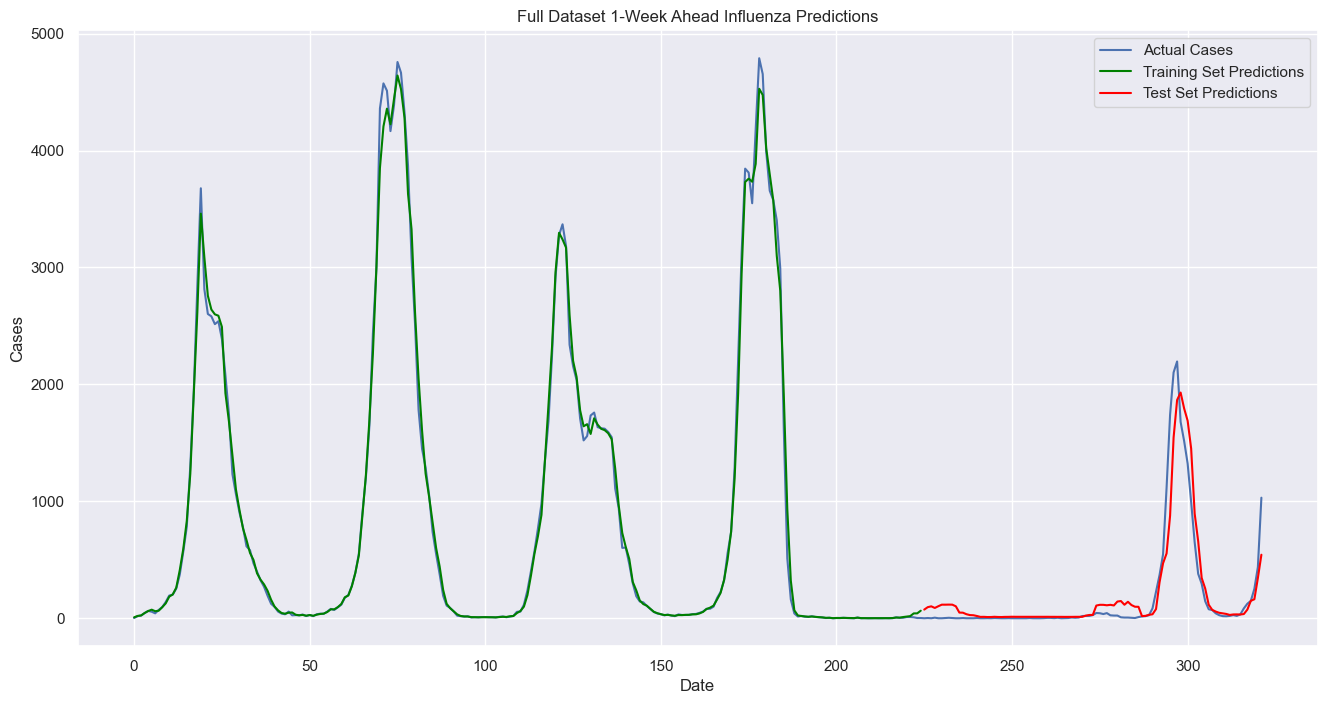

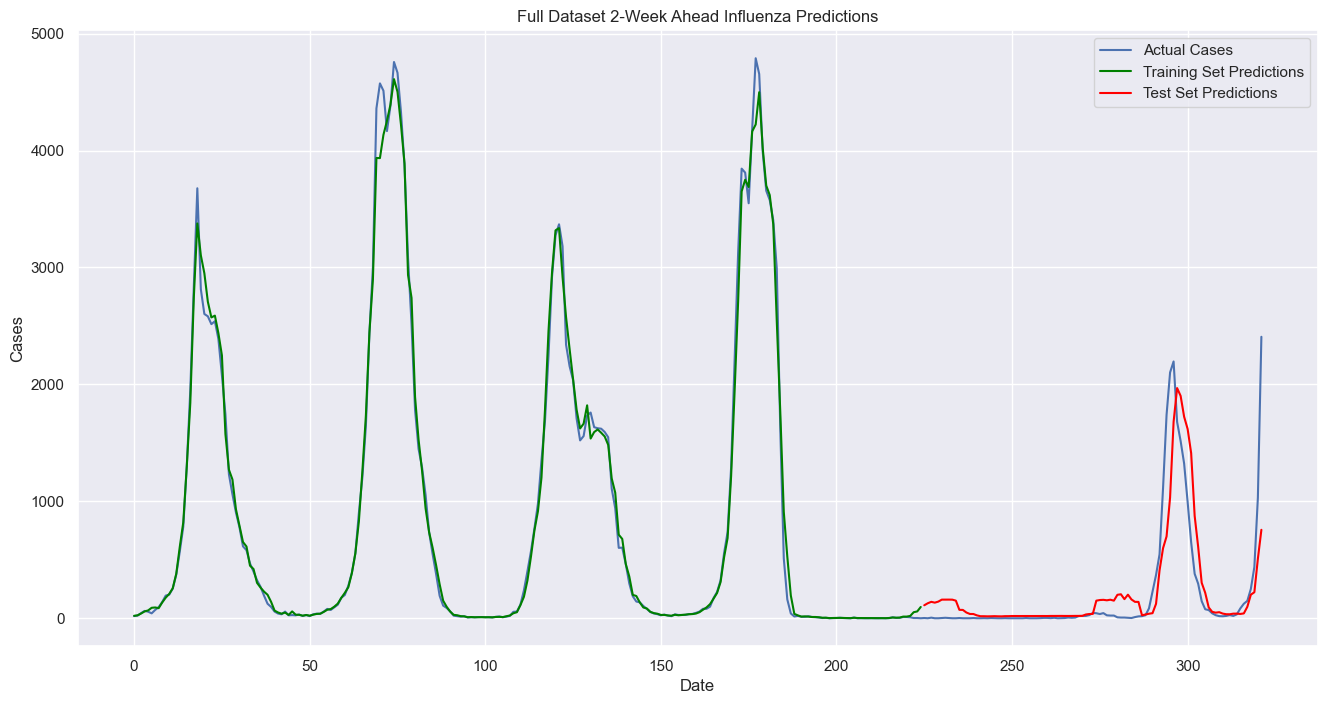

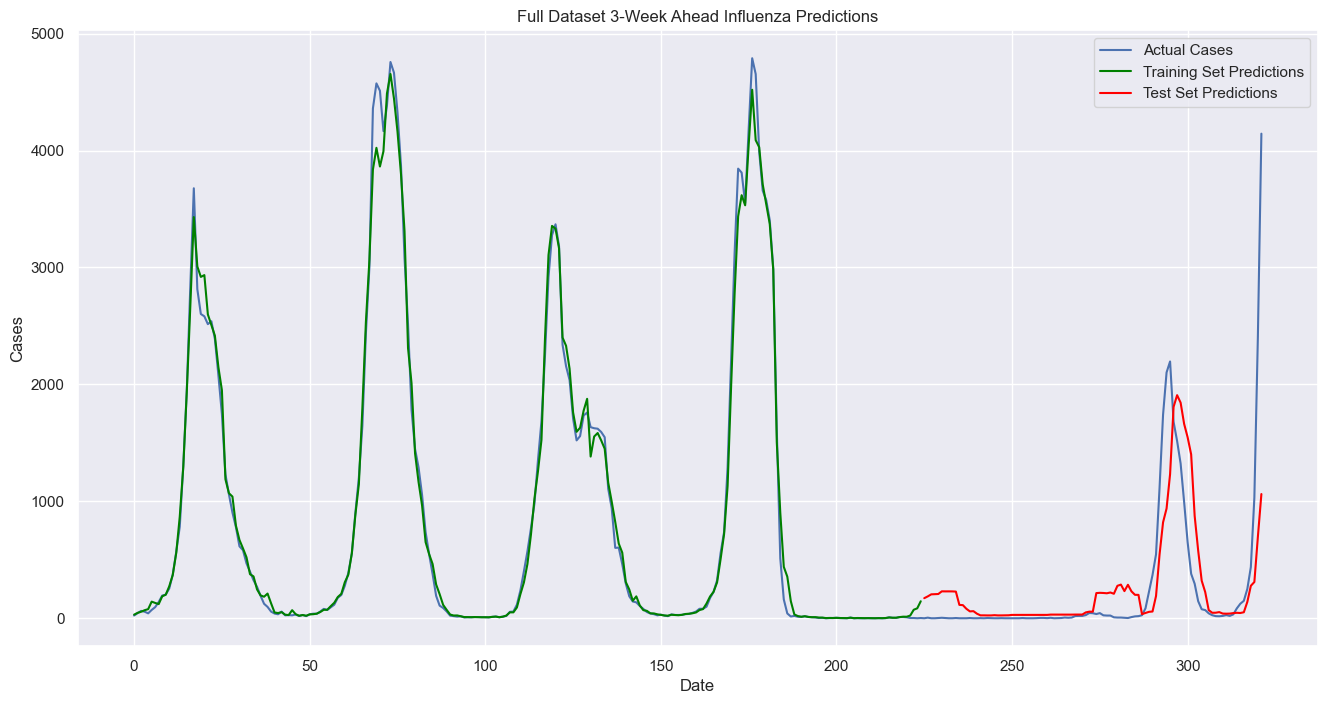

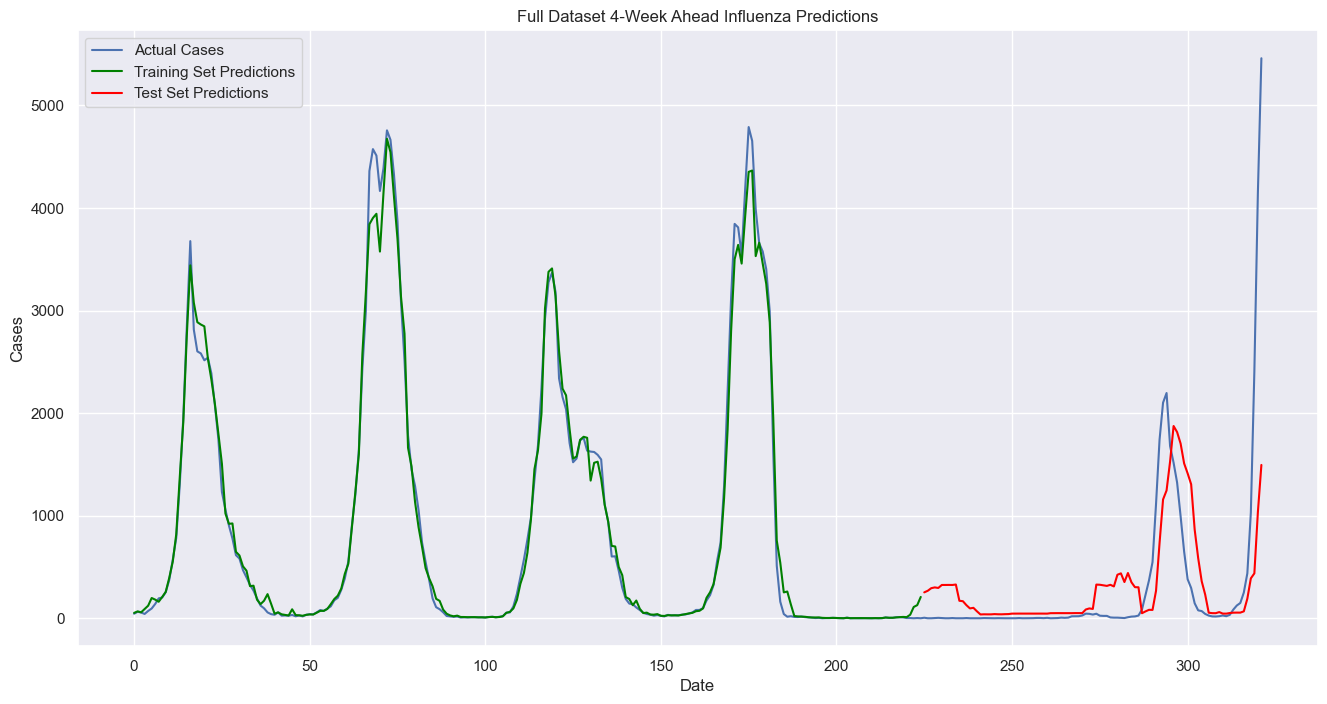

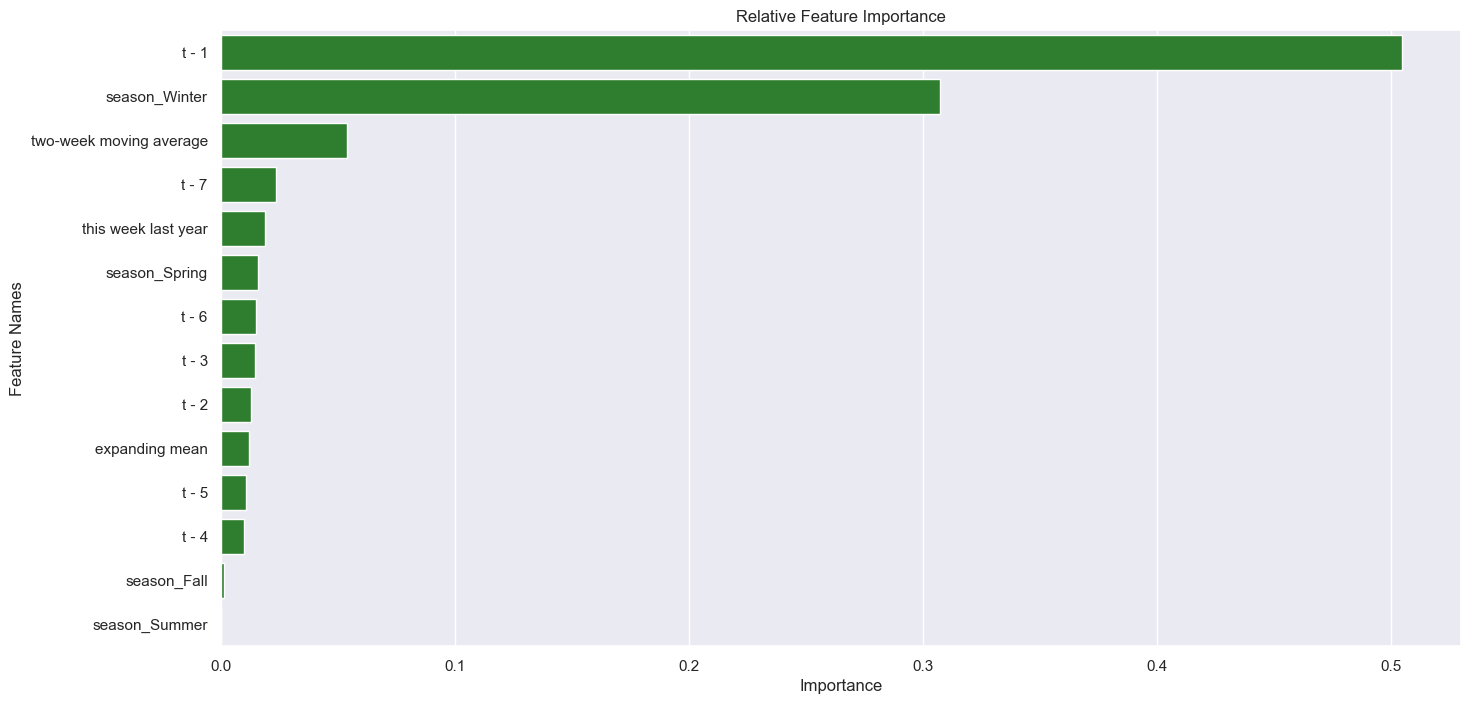

In [77]:
from sklearn.compose import make_column_transformer

numeric_transform = Pipeline([('scaling', MinMaxScaler())])

ct = make_column_transformer((
    numeric_transform, ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean']),
       remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessing', ct), 
                          ('model', RandomForestRegressor(random_state=2023))])

pipeline.fit(train_X, train_y)

preds_test = pipeline.predict(test_X)
preds_test_df = pd.DataFrame(preds_test,columns=test_y.columns)
preds_train = pipeline.predict(train_X)
preds_train_df = pd.DataFrame(preds_train,columns=train_y.columns)

dataset = 'Full Dataset'
model = 'RF_test'

for i in range(1,5):
    results_matrix = evaluate_model(train=train_y, test=test_y, preds_train=preds_train, preds_test=preds_test, dataset=dataset, forecast_weeks=i, model=model)

# plot
week = 1
for target in preds_train_df.columns:
    plt.figure()
    plt.plot(df_time_features.index, df_time_features[target].values, label='Actual Cases')
    plt.plot(df_time_features.index[:train_size], preds_train_df[target], color='green', label='Training Set Predictions')
    plt.plot(df_time_features.index[train_size:], preds_test_df[target], color='red', label='Test Set Predictions')
    plt.title(f'{dataset} {week}-Week Ahead Influenza Predictions')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend()
    week += 1

# get feature importances from the model
# referenced https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
importance = pipeline.steps[1][1].feature_importances_
names = pipeline[:-1].get_feature_names_out()

df = pd.DataFrame({'Feature Names':names,'Importance':importance, })
df = df.sort_values(by='Importance', ascending = False)
df[['dtype','Feature Names']] = df['Feature Names'].str.split("__",expand=True)
df = df.drop(columns='dtype')
plt.figure()
sns.barplot(data=df, x='Importance', y='Feature Names', orient='h', color='forestgreen').set(title='Relative Feature Importance')

results_matrix


In [33]:
preds_test

array([[1900.28, 1745.26, 1668.52, 1667.83],
       [1974.44, 1843.92, 1769.23, 1748.88],
       [1232.22, 1066.08,  912.65,  787.45],
       [1264.01, 1125.63,  977.32,  826.75],
       [1308.6 , 1178.02, 1021.91,  866.7 ],
       [1354.1 , 1236.65, 1077.66,  935.77],
       [1335.25, 1221.24, 1067.76,  941.43],
       [1403.99, 1311.03, 1167.11, 1018.01],
       [1388.14, 1293.78, 1151.7 , 1005.92],
       [1264.79, 1156.7 , 1028.08,  902.82],
       [ 879.67,  734.42,  599.84,  495.02],
       [ 734.29,  613.96,  524.81,  440.01],
       [ 494.54,  391.27,  308.28,  260.15],
       [ 411.16,  321.97,  265.6 ,  224.52],
       [ 312.6 ,  244.21,  211.23,  190.02],
       [ 227.98,  179.87,  169.25,  161.29],
       [ 112.75,   90.81,   76.84,   71.1 ],
       [ 103.51,   83.89,   75.45,   81.61],
       [  96.78,   85.13,   85.76,  101.81],
       [  46.67,   33.88,   30.33,   32.99],
       [  36.31,   30.57,   29.98,   28.65],
       [  31.12,   32.26,   31.47,   33.51],
       [  

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611


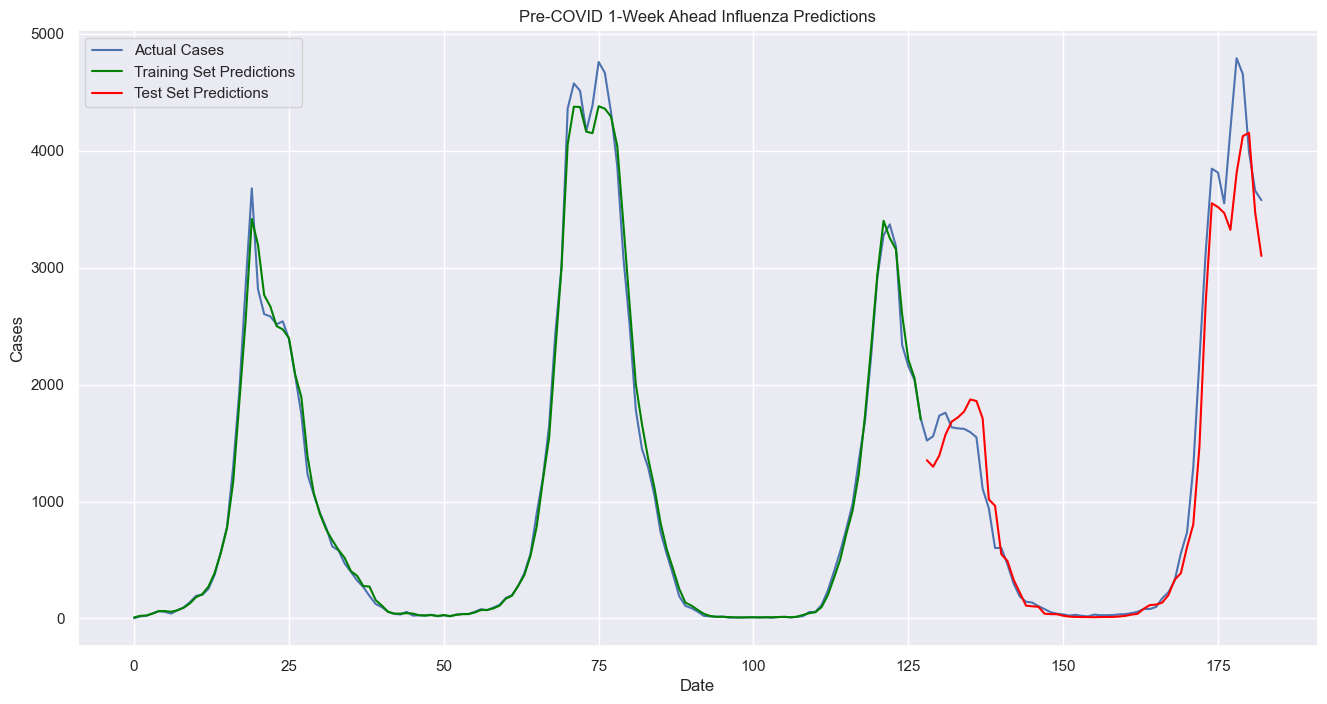

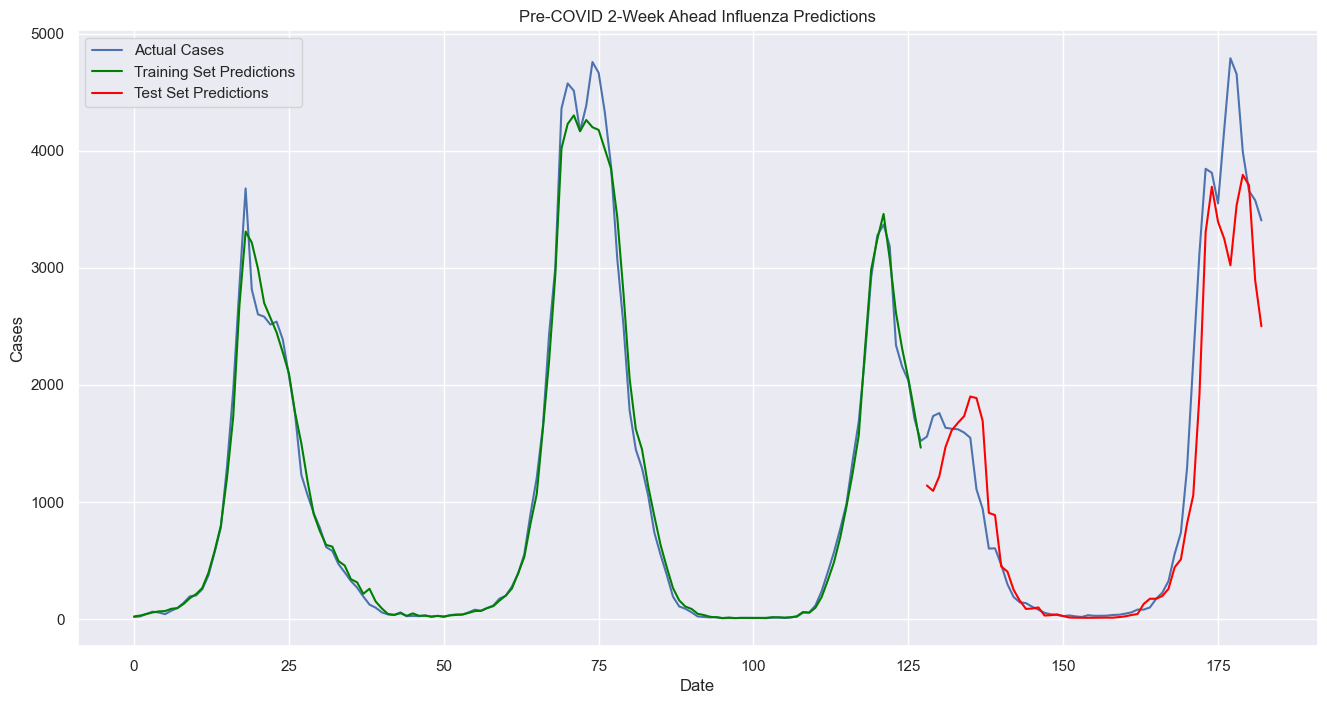

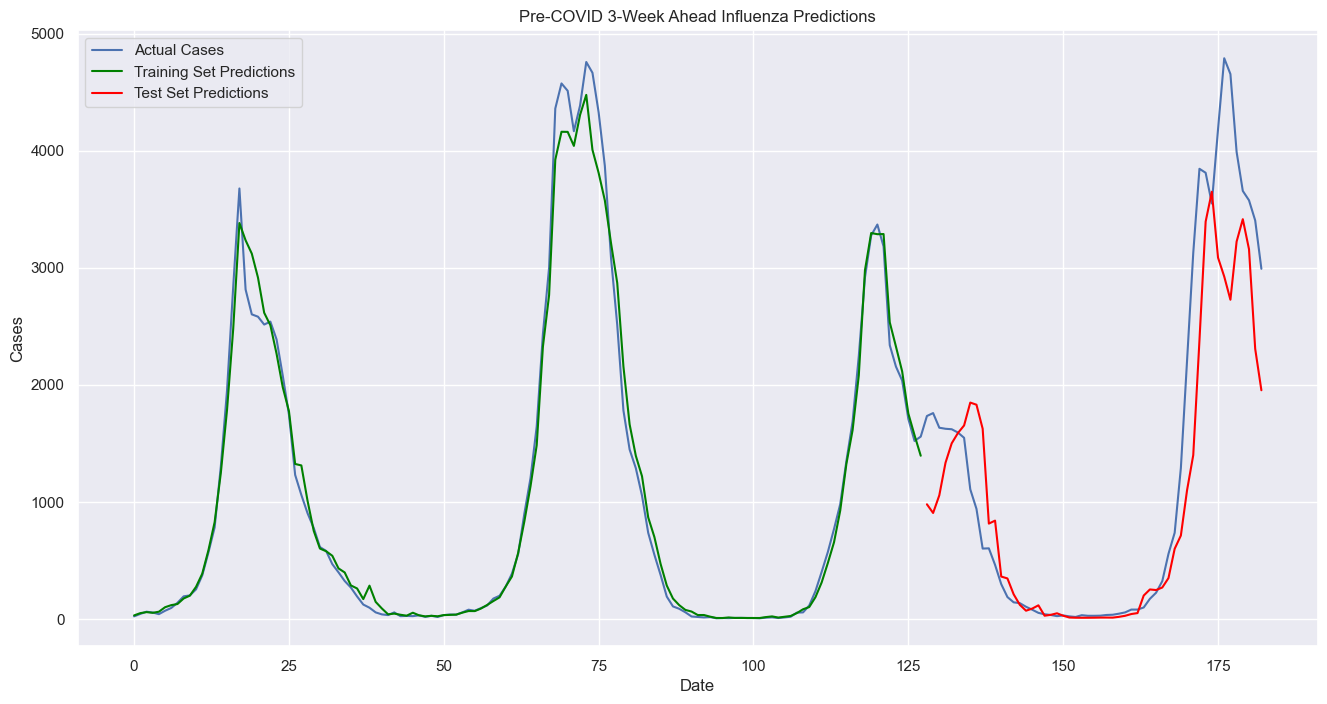

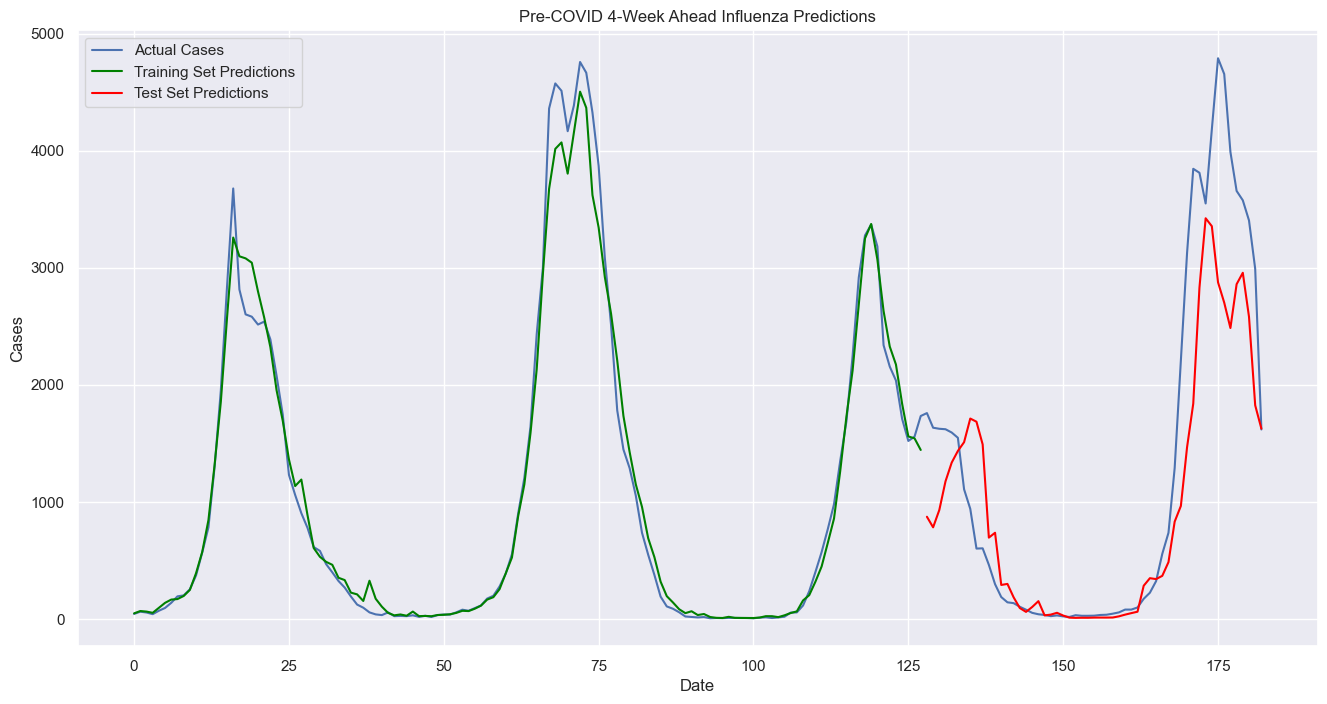

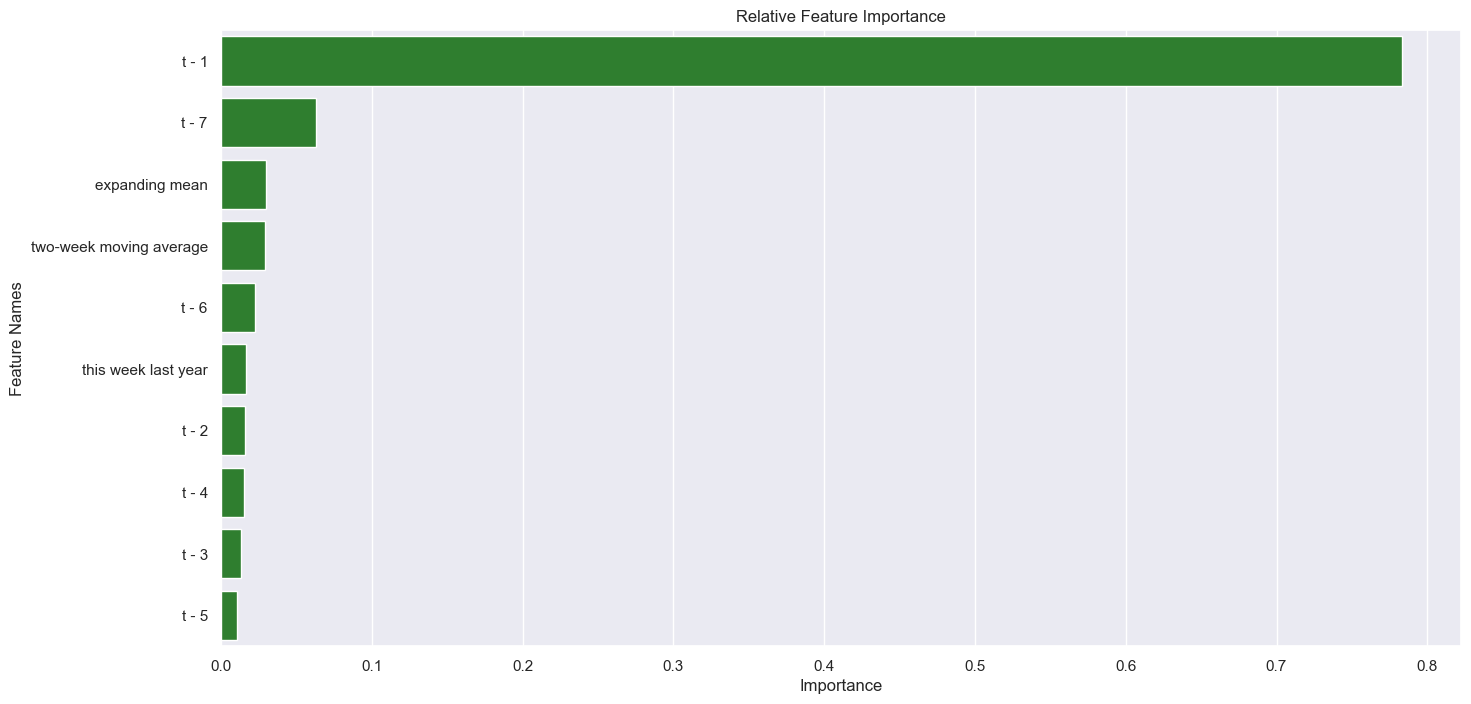

In [31]:
numeric_transform = Pipeline([('scaling', MinMaxScaler())])


preprocessing = ColumnTransformer([('numeric', numeric_transform, ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean'])])

pipeline = Pipeline(steps=[('preprocessing', preprocessing), 
                          ('model', RandomForestRegressor(random_state=2023))])

pipeline.fit(train_X, train_y)

preds_test = pipeline.predict(test_X)
preds_test_df = pd.DataFrame(preds_test,columns=test_y.columns)
preds_train = pipeline.predict(train_X)
preds_train_df = pd.DataFrame(preds_train,columns=train_y.columns)

dataset = 'Pre-COVID'

for i in range(1,5):
    results_matrix = evaluate_model(train=train_y, test=test_y, preds_train=preds_train, preds_test=preds_test, dataset=dataset, forecast_weeks=i, model='RF_test')

# plot
week = 1
for target in preds_train_df.columns:
    plt.figure()
    plt.plot(df_time_features_pre_COVID.index, df_time_features_pre_COVID[target].values, label='Actual Cases')
    plt.plot(df_time_features_pre_COVID.index[:train_size], preds_train_df[target], color='green', label='Training Set Predictions')
    plt.plot(df_time_features_pre_COVID.index[train_size:], preds_test_df[target], color='red', label='Test Set Predictions')
    plt.title(f'{dataset} {week}-Week Ahead Influenza Predictions')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend()
    week += 1

# get feature importances from the model
# referenced https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline


# load model
# model = pickle.load( open( r"..\data\rf_model1.pkl", "rb" ) )

# get importance
importance = pipeline.steps[1][1].feature_importances_
names = pipeline[:-1].get_feature_names_out()

df = pd.DataFrame({'Feature Names':names,'Importance':importance, })
df = df.sort_values(by='Importance', ascending = False)
df[['dtype','Feature Names']] = df['Feature Names'].str.split("__",expand=True)
df = df.drop(columns='dtype')
plt.figure()
sns.barplot(data=df, x='Importance', y='Feature Names', orient='h', color='forestgreen').set(title='Relative Feature Importance')

results_matrix

In [29]:
df

,Feature Names,Importance
0,t - 1,0.783167
6,t - 7,0.063298
9,expanding mean,0.029744
8,two-week moving average,0.029048
5,t - 6,0.022410
7,this week last year,0.016846
1,t - 2,0.015748
3,t - 4,0.015558
2,t - 3,0.013396
4,t - 5,0.010786


In [11]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,RF_test,Pre-COVID,1,10302.8,80629.5,101.5,283.95,55.53,168.86,0.994326,0.961169
0,RF_test,Pre-COVID,2,17799.52,225825.02,133.41,475.21,73.99,270.08,0.99016,0.895611
0,RF_test,Pre-COVID,3,24242.88,414446.0,155.7,643.77,90.56,383.59,0.98655,0.813147
0,RF_test,Pre-COVID,4,32450.11,516137.77,180.14,718.43,105.27,448.67,0.981944,0.767106


In [12]:
for target in preds_train_df.columns:
    print(target)

y1
y2
y3
y4


In [21]:
test_X.tail()

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,expanding mean,season_Fall,season_Spring,season_Summer,season_Winter
178,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1290.0,2037.0,3865.5,942.056522,0,0,0,1
179,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1709.0,4485.5,958.709957,0,0,0,1
180,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,1521.0,4721.5,974.637931,0,0,0,1
181,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,1558.0,4321.5,987.575107,0,0,0,1
182,3656.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,1734.0,3822.5,998.978632,0,0,0,1


In [22]:
df_time_features.tail()

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_4,month_5,month_6,month_7,month_8,month_9,season_Fall,season_Spring,season_Summer,season_Winter
372,438.0,1031.0,2407.0,4144.0,251.0,149.0,124.0,84.0,33.0,20.0,...,0,0,0,0,0,0,1,0,0,0
373,1031.0,2407.0,4144.0,5460.0,438.0,251.0,149.0,124.0,84.0,33.0,...,0,0,0,0,0,0,1,0,0,0
374,2407.0,4144.0,5460.0,NaN,1031.0,438.0,251.0,149.0,124.0,84.0,...,0,0,0,0,0,0,1,0,0,0
375,4144.0,5460.0,NaN,NaN,2407.0,1031.0,438.0,251.0,149.0,124.0,...,0,0,0,0,0,0,1,0,0,0
376,5460.0,NaN,NaN,NaN,4144.0,2407.0,1031.0,438.0,251.0,149.0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df_time_features.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [23]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))

In [24]:
df_flu.tail()

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
372,42,11.0,204.0,214.0,9.0,2022,438.0,202242,2022-10-22
373,43,23.0,595.0,407.0,6.0,2022,1031.0,202243,2022-10-29
374,44,54.0,1351.0,995.0,7.0,2022,2407.0,202244,2022-11-05
375,45,69.0,2265.0,1799.0,11.0,2022,4144.0,202245,2022-11-12
376,46,73.0,2213.0,3159.0,15.0,2022,5460.0,202246,2022-11-19


In [78]:
df_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Surveillance Week  377 non-null    object        
 1   A(H1N1)pdm09       377 non-null    float64       
 2   A(H3N2)            377 non-null    float64       
 3   A(Unsubtyped)      377 non-null    float64       
 4   Influenza B        377 non-null    float64       
 5   Year               377 non-null    object        
 6   Total Cases        377 non-null    float64       
 7   Epiweek            377 non-null    object        
 8   Week Ending        377 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 26.6+ KB


In [42]:
import numpy as np
import pandas as pd
from epiweeks import Week

In [136]:
# df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))
# df_flu = df_flu.drop('2022-11-26', axis=0)
# df_flu

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
...,...
2022-10-22,438.0
2022-10-29,1031.0
2022-11-05,2407.0


In [137]:
# pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu_total.pkl", "wb" ))

In [138]:
# df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))
# df_flu = df_flu.drop(377, axis=0)
# df_flu

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
0,35,1.0,2.0,3.0,3.0,2015,9.0,201535,2015-09-05
1,36,2.0,11.0,5.0,0.0,2015,18.0,201536,2015-09-12
2,37,0.0,10.0,4.0,1.0,2015,15.0,201537,2015-09-19
3,38,0.0,16.0,13.0,0.0,2015,29.0,201538,2015-09-26
4,39,6.0,34.0,13.0,6.0,2015,59.0,201539,2015-10-03
...,...,...,...,...,...,...,...,...,...
372,42,11.0,204.0,214.0,9.0,2022,438.0,202242,2022-10-22
373,43,23.0,595.0,407.0,6.0,2022,1031.0,202243,2022-10-29
374,44,54.0,1351.0,995.0,7.0,2022,2407.0,202244,2022-11-05
375,45,69.0,2265.0,1799.0,11.0,2022,4144.0,202245,2022-11-12


In [139]:
# pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu.pkl", "wb" ))

In [140]:
# new data

new_data = {'Surveillance Week':[47],
            'A(H1N1)pdm09':[119],
            'A(H3N2)':	[2214],
            'A(Unsubtyped)':[5424],
            'Influenza B':[16],
            'Percent Positive A':[23.1],
            'Percent Positive B':[0.0]}

In [141]:
# add new data

new_data_df = pd.DataFrame.from_dict(new_data)
new_data_df = new_data_df.iloc[:,0:5]
for i in range(len(new_data_df)):
    if int(new_data_df['Surveillance Week'][i]) >= 35 & int(new_data_df['Surveillance Week'][i]) <= 53:
        new_data_df['Year'] = "2022"
    else:
        new_data_df['Year'] = "2023"

sum_list = new_data_df.columns[1:5]
new_data_df['Total Cases'] = new_data_df[sum_list].sum(axis=1)
new_data_df['Surveillance Week'] = new_data_df['Surveillance Week'].astype(int).astype(str)
new_data_df['Surveillance Week'] = new_data_df['Surveillance Week'].str.pad(2, fillchar='0')
new_data_df['Year'] = new_data_df['Year'].astype(int).astype(str)
new_data_df['Epiweek'] = new_data_df['Year'] + new_data_df['Surveillance Week'].astype(str)
new_data_df['Week Ending'] = new_data_df['Epiweek'].apply(lambda x: Week.fromstring(x).enddate())
new_data_df['Week Ending'] = pd.to_datetime(new_data_df['Week Ending'], format="%Y-%m-%d")

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))
df_flu = pd.concat([df_flu, new_data_df], axis=0)
df_flu = df_flu.reset_index(drop=True)
pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu.pkl", "wb" ))
df_flu = df_flu[['Week Ending', 'Total Cases']]
df_flu = df_flu.set_index('Week Ending')
pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu_total.pkl", "wb" ))

In [143]:
# use existing data

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# add next three weeks to predict as well
df_flu['y2'] = df_flu['Total Cases'].shift(-1)
df_flu['y3'] = df_flu['Total Cases'].shift(-2)
df_flu['y4'] = df_flu['Total Cases'].shift(-3)
df_flu.rename(columns={'Total Cases':'y1'}, inplace=True)

# extract year, month and week
# df_flu = df_flu.set_index('Week Ending')
df_flu['year'] = df_flu.index.year
df_flu['month'] = df_flu.index.month

# df_flu['week'] = df_flu.index.isocalendar().week

# add season
season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_flu["season"] = df_flu["month"].map(season_dict)

# include 7 lag features (based on autocorrelation plot showing significant autocorrelation for 7 previous values)
arr_list = []
for i in range(1,8):
    arr_list.append(df_flu['y1'].shift(i).to_numpy())

col_names = [*range(1,8)]
new_col_names = []
for name in col_names:
    name = 't - ' + str(name)
    new_col_names.append(name)
df = pd.DataFrame.from_dict(dict(zip(new_col_names, arr_list)))
df_flu = df_flu.reset_index(drop=True)
df_flu = pd.concat([df_flu, df], axis=1)

# same week from previous year
df_flu['this week last year'] = df_flu['y1'].shift(52)

# use 2-week moving average (based on EDA - simplifies the pattern without losing too much data)
df_flu['two-week moving average'] = df_flu['t - 1'].rolling(window=2).mean()

# expanding mean
df_flu['expanding mean'] = df_flu['t - 1'].expanding().mean()

pickle.dump(df_flu, open(r"..\data\flu_cases\df_time_features.pkl", "wb" ))


In [170]:
df_health_indicators = pickle.load(open(r"..\data\health_indicators\df_health_indicators.pkl", "rb" ))
df_flu_symptoms = pickle.load(open(r"..\data\google_trend\df_flu_symptoms.pkl", "rb" ))
df_COVID_terms = pickle.load(open(r"..\data\google_trend\df_COVID_terms.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

# df_air_travel = pickle.load(open(r"..\data\mobility\df_air_travel.pkl", "rb" ))
# df_urban_transit = pickle.load(open(r"..\data\mobility\df_urban_transit.pkl", "rb" ))

In [172]:
df_list = [df_time_features, df_health_indicators, df_flu_symptoms, df_COVID_terms, ]
df = pd.concat(df_list, axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(columns=['Total Cases','index','week'])

# last row to make prediction on
df_to_predict = df.iloc[-1,:]

df = df.dropna()

cat_feats = df[['year','month','season']].astype(str)
num_feats = df.drop(columns=['year','month','season'])